In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\covid_data.csv")
df

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [4]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,225,225,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other names,224,224,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISO 3166-1 alpha-3 CODE,225,225,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,225.0,NaN,NaN,NaN,35073207.435556,139241847.699065,805.0,566557.0,5827911.0,21905848.0,1439323776.0
Continent,225,6,Africa,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Cases,225.0,NaN,NaN,NaN,2184781.453333,7275937.87849,1.0,24071.0,163936.0,1092547.0,81839052.0
Total Deaths,225.0,NaN,NaN,NaN,27448.128889,96891.768388,0.0,189.0,1965.0,13660.0,1008222.0
Tot Cases//1M pop,225.0,NaN,NaN,NaN,136900.373333,145060.340289,9.0,11384.0,88987.0,223335.0,696044.0
Tot Deaths/1M pop,225.0,NaN,NaN,NaN,1096.715556,1195.715543,0.0,123.0,708.0,1795.0,6286.0
Death percentage,225.0,NaN,NaN,NaN,1.444125,1.741728,0.0,0.511291,1.036905,1.977017,18.151787


In [19]:
print(df.isnull().sum())

country                    0
other_names                1
iso_3166-1_alpha-3_code    0
population                 0
continent                  0
total_cases                0
total_deaths               0
tot cases//1m_pop          0
tot deaths/1m_pop          0
death_percentage           0
dtype: int64


In [22]:
df[df.isnull().any(axis=1)]

,country,other_names,iso_3166-1_alpha-3_code,population,continent,total_cases,total_deaths,tot cases//1m_pop,tot deaths/1m_pop,death_percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_37296\1842323058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_37296\1842323058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [24]:
df.isnull().sum()

country                    0
other_names                0
iso_3166-1_alpha-3_code    0
population                 0
continent                  0
total_cases                0
total_deaths               0
tot cases//1m_pop          0
tot deaths/1m_pop          0
death_percentage           0
dtype: int64

In [28]:
# %%
# 9. Check rows which contain null values
df[df.isnull().any(axis=1)]


,country,other_names,iso_3166-1_alpha-3_code,population,continent,total_cases,total_deaths,tot cases//1m_pop,tot deaths/1m_pop,death_percentage


In [37]:
df.columns


Index(['country', 'other_names', 'iso_3166-1_alpha-3_code', 'population',
       'continent', 'total_cases', 'total_deaths', 'tot cases//1m_pop',
       'tot deaths/1m_pop', 'death_percentage'],
      dtype='object')

In [29]:
df.isnull().sum()

country                    0
other_names                0
iso_3166-1_alpha-3_code    0
population                 0
continent                  0
total_cases                0
total_deaths               0
tot cases//1m_pop          0
tot deaths/1m_pop          0
death_percentage           0
dtype: int64

In [38]:
df.columns = df.columns.str.strip().str.lower()

rename_map = {
    'total_cases': 'confirmed',
    'cases': 'confirmed',
    'country_region': 'country',
    'location': 'country',
    'country_name': 'country',
    'total_deaths': 'deaths',
    'death': 'deaths',
    'deaths_total': 'deaths',
    'recoveries': 'recovered'
}

df.rename(columns=rename_map, inplace=True)

print("✅ Columns after renaming:\n", df.columns.tolist())

✅ Columns after renaming:
 ['country', 'other_names', 'iso_3166-1_alpha-3_code', 'population', 'continent', 'confirmed', 'deaths', 'tot\xa0cases//1m_pop', 'tot\xa0deaths/1m_pop', 'death_percentage']


In [39]:
top5_cases = df.nlargest(5, 'confirmed')[['country', 'confirmed']]
top5_cases


,country,confirmed
214,USA,81839052
92,India,43029044
26,Brazil,29999816
70,France,25997852
76,Germany,21646375


     country  confirmed
214      USA   81839052
92     India   43029044
26    Brazil   29999816
70    France   25997852
76   Germany   21646375


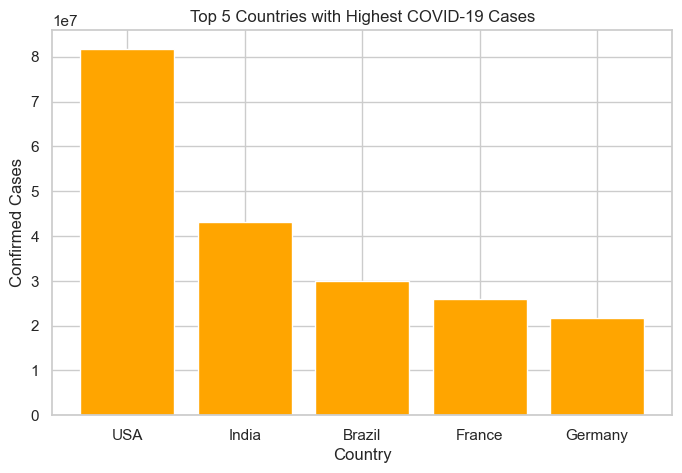

In [41]:
# 12. Top 5 countries with greatest number of covid cases
top5_cases = df.nlargest(5, 'confirmed')[['country', 'confirmed']]
print(top5_cases)

# 13. Plot the top 5 countries
plt.figure(figsize=(8,5))
plt.bar(top5_cases['country'], top5_cases['confirmed'], color='orange')
plt.title('Top 5 Countries with Highest COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()


In [42]:
top5_cases = df.nlargest(5, 'confirmed')[['country', 'confirmed']]
top5_cases

,country,confirmed
214,USA,81839052
92,India,43029044
26,Brazil,29999816
70,France,25997852
76,Germany,21646375


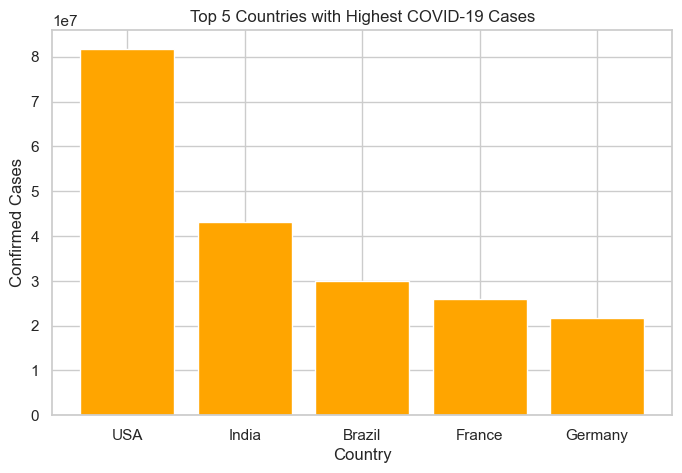

In [43]:
plt.figure(figsize=(8,5))
plt.bar(top5_cases['country'], top5_cases['confirmed'], color='orange')
plt.title('Top 5 Countries with Highest COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()

In [44]:
least5_cases = df.nsmallest(5, 'confirmed')[['country', 'confirmed']]
least5_cases

,country,confirmed
131,Micronesia,1
168,Saint Helena,2
125,Marshall Islands,7
148,Niue,7
221,Western Sahara,10


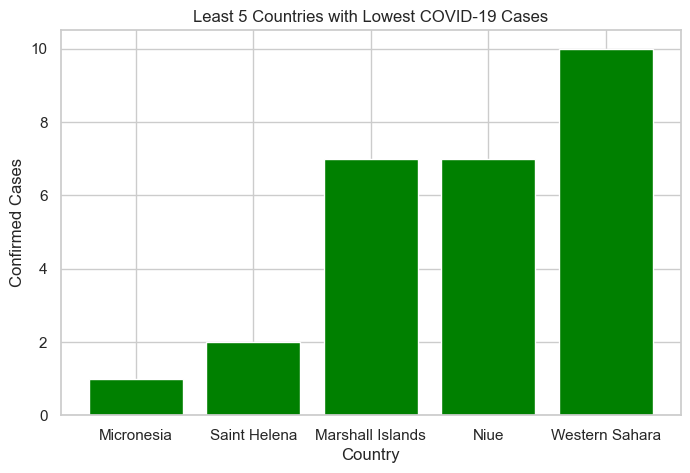

In [45]:
plt.figure(figsize=(8,5))
plt.bar(least5_cases['country'], least5_cases['confirmed'], color='green')
plt.title('Least 5 Countries with Lowest COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()

In [46]:
top5_deaths = df.nlargest(5, 'deaths')[['country', 'deaths']]
top5_deaths

,country,deaths
214,USA,1008222
26,Brazil,660269
92,India,521388
165,Russia,369708
130,Mexico,323212


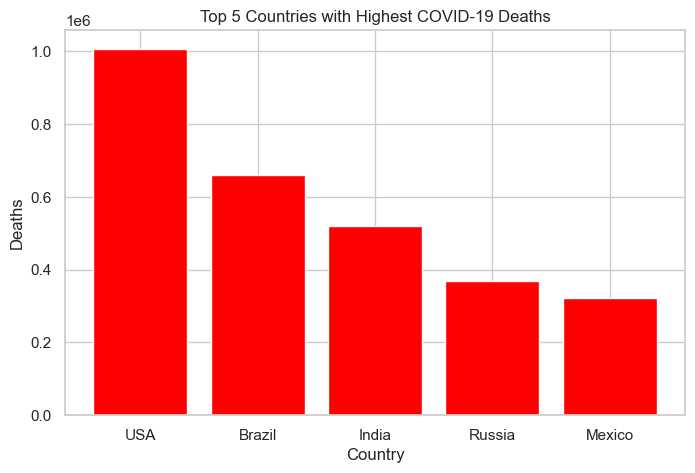

In [47]:
plt.figure(figsize=(8,5))
plt.bar(top5_deaths['country'], top5_deaths['deaths'], color='red')
plt.title('Top 5 Countries with Highest COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.show()

In [48]:
least5_deaths = df.nsmallest(5, 'deaths')[['country', 'deaths']]
least5_deaths

,country,deaths
46,Cook Islands,0
67,Falkland Islands,0
118,Macao,0
125,Marshall Islands,0
131,Micronesia,0


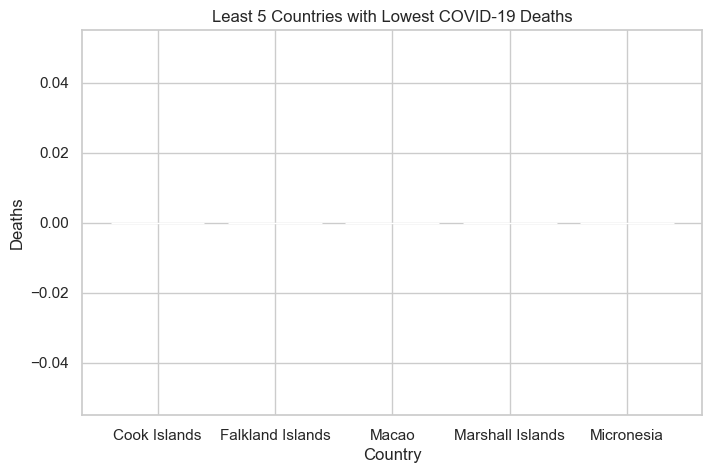

In [49]:
plt.figure(figsize=(8,5))
plt.bar(least5_deaths['country'], least5_deaths['deaths'], color='purple')
plt.title('Least 5 Countries with Lowest COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.show()

In [50]:
df['death_percentage'] = (df['deaths'] / df['confirmed']) * 100
top5_death_percent = df.nlargest(5, 'death_percentage')[['country', 'death_percentage']]
top5_death_percent

,country,death_percentage
222,Yemen,18.151787
221,Western Sahara,10.000000
193,Sudan,7.920265
158,Peru,5.983499
130,Mexico,5.705041


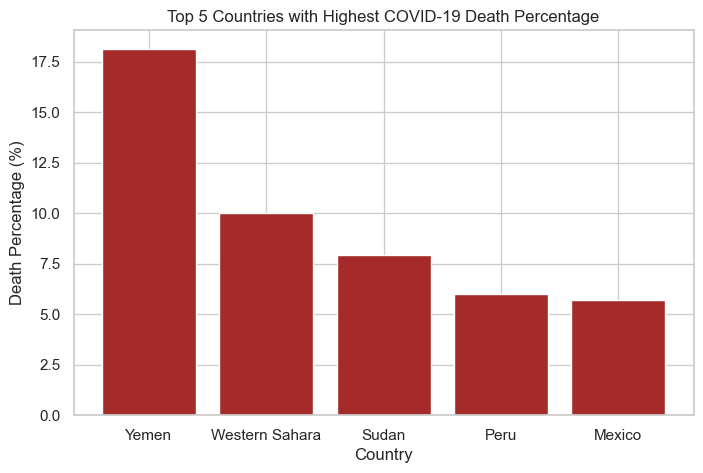

In [51]:
plt.figure(figsize=(8,5))
plt.bar(top5_death_percent['country'], top5_death_percent['death_percentage'], color='brown')
plt.title('Top 5 Countries with Highest COVID-19 Death Percentage')
plt.xlabel('Country')
plt.ylabel('Death Percentage (%)')
plt.show()

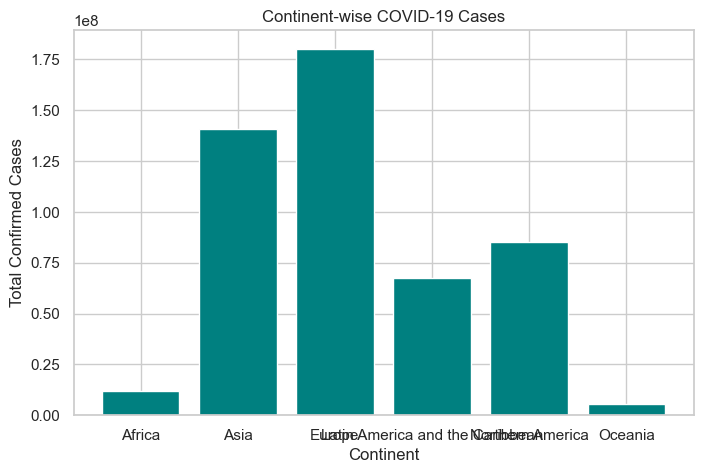

In [53]:
if 'continent' in df.columns:
    plt.figure(figsize=(8,5))
    plt.bar(continent_cases['continent'], continent_cases['confirmed'], color='teal')
    plt.title('Continent-wise COVID-19 Cases')
    plt.xlabel('Continent')
    plt.ylabel('Total Confirmed Cases')
    plt.show()

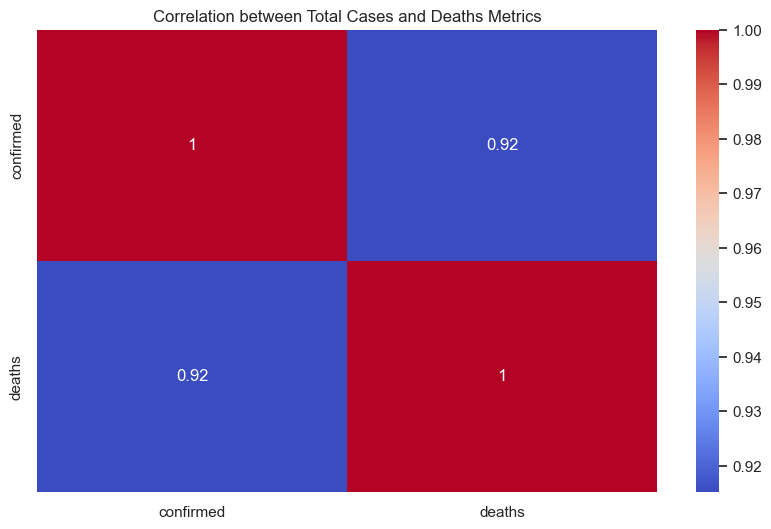

In [54]:
corr_cols = ['confirmed', 'deaths']
for alt in ['deaths/1m pop', 'total_deaths_per_million', 'deaths_per_million']:
    if alt in df.columns:
        corr_cols.append(alt)

corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Total Cases and Deaths Metrics')
plt.show()

#Analysis and Observations
 #1-Overview of Dataset:
 This dataset shows how COVID-19 affected different countries
 and continents.
 It includes total cases, deaths, population,
 and death percentages.
 I filled in missing data by carrying forward
 the last known values to keep the data complete.
 So in summary almost all the details are extracted from
 file

#2-Key Observations:
 Some countries have much higher numbers of cases
 and deaths than others.
 The charts clearly show the top five countries
 with the most cases and deaths,
 as well as the five with the least.
 I noticed that some countries have a much higher
 death rate compared to their total cases.
 Death rate varies according to wealth and health facilities
 of a copuntry too

#3-Insights from Visualizations:
 When looking at the cases by continent,
 it’s clear that some continents were hit harder
 than others.
 Comparing population size
 with cases shows that usually bigger populations
 have more cases,
 but a few countries are exceptions.
 The heatmap shows a strong link between total cases and
 deaths per million people

#4-Conclusion
 In this project, I analyzed COVID-19 data from many countries
 and continents to understand
 how the virus impacted different places around the world.
 The dataset included total confirmed cases, deaths, populations,
 and death percentages. I made sure to fill missing information
 carefully to keep the data accurate before doing further analysis.
 The results show that countries like the USA, India,
 and Brazil had the highest cases and deaths,
 which agrees with the global news about the pandemic.
 Some smaller countries had very few cases and deaths.
 The death percentage helped identify which countries
 had the most severe outcomes
 compared to their case numbers.By grouping data by continent,
 it was clear that Asia and Europe faced the highest number of cases,
 while Oceania had the lowest. When I looked at how population size relates to cases, I found that countries with bigger populations
 generally had more cases,
 although there were some exceptions. The heatmap showed a strong positive
 connection between total cases anddeaths per million people,
 which means more cases usually led to more deaths.
 This analysis gives useful insight into where COVID-19 hit hardest.
 Understanding this helps governments prepare andrespond better to future outbreaks
 In [ ]:
 In [ ]:
 In [ ]:
 saving more lives and managing resources more effectively.